#### Execute always the following cells to init the notebook:

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import json
from pathlib import Path
import math
import pandas as pd
import numpy as np
from dotenv import find_dotenv, load_dotenv
import requests
# import enforce
import logging
import uuid

import backtester
from ers_experimenter import ERSExperiment
import utils

def human_readable_number( num ):
    if num > 1e9:
        return "%.2f bn" % (num/1e9)
    if num > 1e6:
        return "%.2f m" % (num/1e6)
    if num > 1e4:
        return "%.2f k" % (num/1e3)
    if abs(num) <= 1.0:
        return "%.1f %%" % (100.0*num)
    return str(num)

def pp(dct: dict):
    for k in dct.keys():
        print(f'{k}: {human_readable_number(dct[k])}')

In [3]:
logging.getLogger("requests").setLevel(logging.WARNING)
logging.getLogger("urllib3").setLevel(logging.WARNING)
os.environ['PYTHON_LOG_LEVEL'] = 'info'
base_path_to_data = Path(os.environ.get('HOME')) / 'host' / 'data' / 'processed'

In [4]:
response = requests.get(os.environ['ERS_BASEURI'] + '/aux_service/info')
response.text

'{"git-revision":"23399d7158ca2e8e7d1f8058e0d9b61eea98e769","dedupe-infos":"dedupe_model_filepath=/usr/local/lib/entity-recognition-service/python/resources/latest.model;DEDUPE_MIN_SIMILARITY_FOR_A_MATCH=.5","environment-variables":{"DEDUPE_SEARCH_MAX_THRESHOLD":"5","DEDUPE_MODEL":"latest.model"}}'

## Speed profiling the ERS

#### Speed test of createEntity

In [11]:
%time experiment = ERSExperiment(base_path_to_data / '2018-07-03-big_set_with_full_but_manipulated_information_golden_data.pkl')

13:19:19.029 - INFO - Starting to populate ERS
13:19:19.029 - WARNING - First purging the complete database.
13:19:28.029 - INFO - Calling ERS on http://ers:8080 with 31152 records for the golden data set.
13:19:33.029 - INFO - At step 100 avg processing time per company entry was 0.0431 ms
13:19:36.029 - INFO - At step 200 avg processing time per company entry was 0.0340 ms
13:19:40.029 - INFO - At step 300 avg processing time per company entry was 0.0362 ms
13:19:43.029 - INFO - At step 400 avg processing time per company entry was 0.0337 ms
13:19:46.029 - INFO - At step 500 avg processing time per company entry was 0.0340 ms
13:19:50.029 - INFO - At step 600 avg processing time per company entry was 0.0342 ms
13:19:53.029 - INFO - At step 700 avg processing time per company entry was 0.0339 ms
13:19:57.029 - INFO - At step 800 avg processing time per company entry was 0.0339 ms
13:20:00.029 - INFO - At step 900 avg processing time per company entry was 0.0341 ms
13:20:04.029 - INFO 

KeyboardInterrupt: 

In [ ]:
docker-compose logs ers | grep "1st part of" | cut -c 26- | jq '.message' | sed s/\"//g | csvcut -d ' ' -c 8 > data/raw/profiling/1st_part_with_index.times
docker-compose logs ers | grep "2nd part of" | cut -c 26- | jq '.message' | sed s/\"//g | csvcut -d ' ' -c 8 > data/raw/profiling/2nd_part_with_index.times-compose logs ers | grep "1st part of" | cut -c 26- | jq '.message' | sed s/\"//g | csvcut -d ' ' -c 8 > 

In [6]:
fst = pd.read_csv('../../1st_part.times', names=['ts'])[5:]
snd = pd.read_csv('../../2nd_part.times', names=['ts'])[5:]

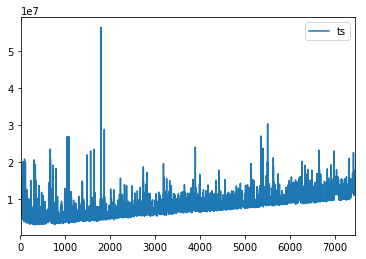

In [7]:
fst.plot()

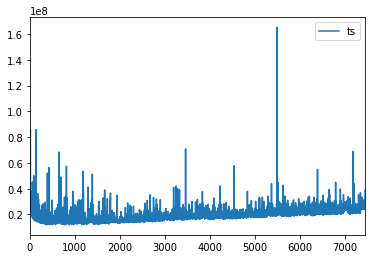

In [9]:
snd.plot()

In [12]:
fst = pd.read_csv('../../data/raw/profiling/1st_part_with_index.times', names=['ts'])[5:]
snd = pd.read_csv('../../data/raw/profiling/2nd_part_with_index.times', names=['ts'])[5:]

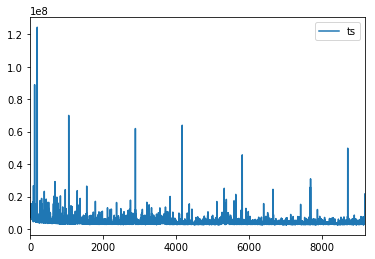

In [8]:
fst.plot()

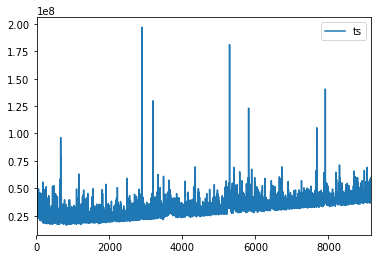

In [9]:
snd.plot()

#### Speed test of restarting the ERS and loading the entries back into the dedupe model

In [ ]:
%time experiment = ERSExperiment(base_path_to_data / '2018-07-03-medium_set_with_full_information_golden_data.pkl')

10:39:16.021 - INFO - Starting to populate ERS
10:39:16.021 - WARNING - First purging the complete database.
10:39:16.021 - INFO - Calling ERS on http://ers:8080/ers_service with 9926 records for the golden data set.
10:39:22.021 - INFO - At step 100 avg processing time per company entry was 0.0582 ms
10:39:26.021 - INFO - At step 200 avg processing time per company entry was 0.0345 ms


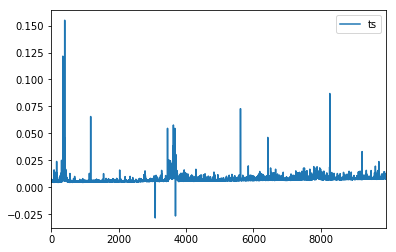

In [10]:
adding_entity = pd.read_csv('../../data_fh/raw/profiling/adding_entity.times', names=['ts'])
adding_entity.plot()

In [11]:
adding_entity.ts.describe()

count    9926.000000
mean        0.007196
std         0.003270
min        -0.028443
25%         0.005836
50%         0.006787
75%         0.007707
max         0.154932
Name: ts, dtype: float64

### after removing the usage of known_entities

In [ ]:
docker-compose logs ers | grep "Adding entity in" | csvcut -d ' ' -c 22 > data_fh/raw/profiling/adding_entity_wo_knownentities.times

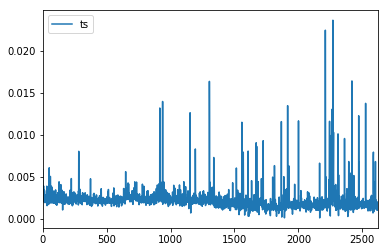

In [8]:
adding_entity = pd.read_csv('../../data_fh/raw/profiling/adding_entity_wo_knownentities.times', names=['ts'])
adding_entity.plot()

In [9]:
adding_entity.ts.describe()

count    2620.000000
mean        0.002217
std         0.001331
min         0.000146
25%         0.001654
50%         0.002082
75%         0.002405
max         0.023624
Name: ts, dtype: float64

In [5]:
%time experiment = ERSExperiment(base_path_to_data / '2018-07-03-medium_set_with_full_information_golden_data.pkl')

15:03:42.025 - INFO - Starting to populate ERS
15:03:42.025 - WARNING - First purging the complete database.
15:03:42.025 - INFO - Calling ERS on http://ers:8080 with 9926 records for the golden data set.
15:03:48.025 - INFO - At step 100 avg processing time per company entry was 0.0635 ms
15:03:52.025 - INFO - At step 200 avg processing time per company entry was 0.0378 ms
15:03:56.025 - INFO - At step 300 avg processing time per company entry was 0.0388 ms
15:03:59.025 - INFO - At step 400 avg processing time per company entry was 0.0338 ms
15:04:02.025 - INFO - At step 500 avg processing time per company entry was 0.0305 ms
15:04:05.025 - INFO - At step 600 avg processing time per company entry was 0.0308 ms
15:04:09.025 - INFO - At step 700 avg processing time per company entry was 0.0389 ms
15:04:13.025 - INFO - At step 800 avg processing time per company entry was 0.0337 ms
15:04:16.025 - INFO - At step 900 avg processing time per company entry was 0.0322 ms
15:04:20.025 - INFO -

KeyboardInterrupt: 

#### Speed test of matching entities

In [14]:
%time experiment = ERSExperiment(base_path_to_data / '2018-07-03-small_set_with_full_information_golden_data.pkl')

13:26:38.029 - INFO - Starting to populate ERS
13:26:38.029 - WARNING - First purging the complete database.
13:26:46.029 - INFO - Calling ERS on http://ers:8080 with 998 records for the golden data set.
13:26:49.029 - INFO - At step 100 avg processing time per company entry was 0.0313 ms
13:26:52.029 - INFO - At step 200 avg processing time per company entry was 0.0288 ms
13:26:55.029 - INFO - At step 300 avg processing time per company entry was 0.0294 ms
13:26:58.029 - INFO - At step 400 avg processing time per company entry was 0.0300 ms
13:27:00.029 - INFO - At step 500 avg processing time per company entry was 0.0289 ms
13:27:04.029 - INFO - At step 600 avg processing time per company entry was 0.0339 ms
13:27:07.029 - INFO - At step 700 avg processing time per company entry was 0.0319 ms
13:27:10.029 - INFO - At step 800 avg processing time per company entry was 0.0312 ms
13:27:13.029 - INFO - At step 900 avg processing time per company entry was 0.0322 ms
13:27:17.029 - INFO - 

In [9]:
exp_id, _ = experiment.process_evaluation_dataset(base_path_to_data / '2018-07-03-small_set_with_full_information_evaluation_data.pkl')

11:09:53.021 - INFO - Calling ERS to match http://ers:8080/ers_service with 1011 records from the evaluation data set against the golden data.
11:09:53.021 - INFO - Going to store all results of the experiment at /home/datascientist/host/experiments/da74cf22-4bc9-11e9-a9ff-0242ac1d0003/results.
11:10:07.021 - INFO - Matched 100 of 1011 9.89 % entries.
11:10:07.021 - INFO - Accuracy is 100.00 %
11:10:20.021 - INFO - Matched 200 of 1011 19.78 % entries.
11:10:20.021 - INFO - Accuracy is 100.00 %
11:10:34.021 - INFO - Matched 300 of 1011 29.67 % entries.
11:10:34.021 - INFO - Accuracy is 100.00 %
11:10:46.021 - INFO - Matched 400 of 1011 39.56 % entries.
11:10:46.021 - INFO - Accuracy is 100.00 %
11:11:01.021 - INFO - Matched 500 of 1011 49.46 % entries.
11:11:01.021 - INFO - Accuracy is 100.00 %
11:11:14.021 - INFO - Matched 600 of 1011 59.35 % entries.
11:11:14.021 - INFO - Accuracy is 100.00 %
11:11:27.021 - INFO - Matched 700 of 1011 69.24 % entries.
11:11:27.021 - INFO - Accuracy is 

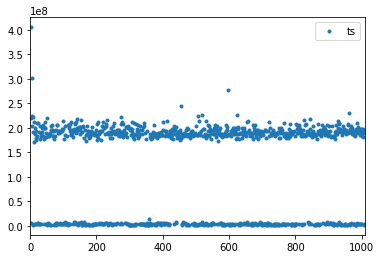

In [15]:
tl = pd.read_csv('../../whole_matchC_small.times', names=['ts'])
tl.plot(style='.')

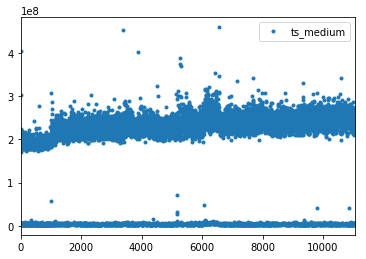

In [24]:
# tls = pd.read_csv('../../whole_matchC_small.times', names=['ts_small'])
tlm = pd.read_csv('../../whole_matchC_medium.times', names=['ts_medium'])
tlm[tlm.ts_medium<.5e9].plot(style='.')

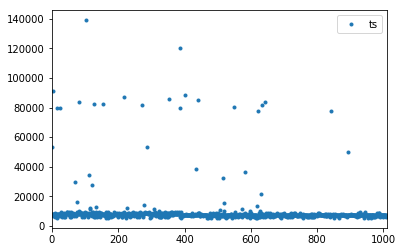

In [16]:
tl = pd.read_csv('../../match_by_id_small.times', names=['ts'])
tl.plot(style='.')

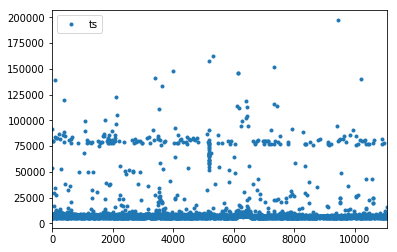

In [25]:
tl = pd.read_csv('../../match_by_id_medium.times', names=['ts'])
tl.plot(style='.')

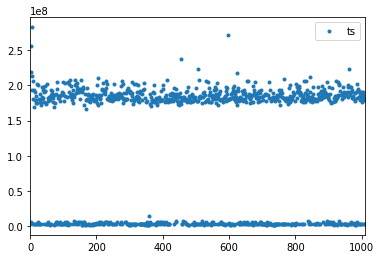

In [14]:
tl = pd.read_csv('../../match_dedupe_small.times', names=['ts'])
tl.plot(style='.')

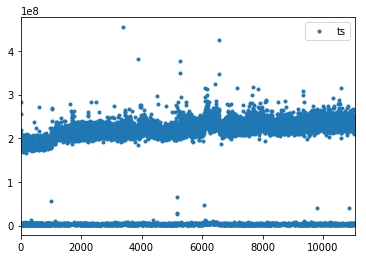

In [27]:
tl = pd.read_csv('../../match_dedupe_medium.times', names=['ts'])
tl[tl.ts<.5e9].plot(style='.')

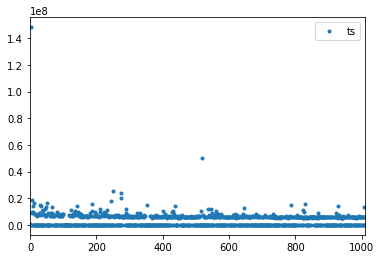

In [17]:
tl = pd.read_csv('../../clean_persons_small.times', names=['ts'])
tl.plot(style='.')

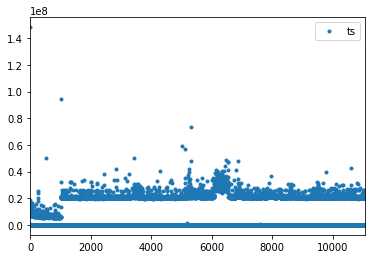

In [29]:
tl = pd.read_csv('../../clean_persons_medium.times', names=['ts'])
tl[tl.ts<.2e9].plot(style='.')

In [18]:
%time experiment = ERSExperiment(base_path_to_data / '2018-07-03-medium_set_with_full_information_golden_data.pkl')

11:23:31.021 - INFO - Starting to populate ERS
11:23:31.021 - WARNING - First purging the complete database.
11:23:33.021 - INFO - Calling ERS on http://ers:8080/ers_service with 9926 records for the golden data set.
11:23:36.021 - INFO - At step 100 avg processing time per company entry was 0.0246 ms
11:23:38.021 - INFO - At step 200 avg processing time per company entry was 0.0213 ms
11:23:40.021 - INFO - At step 300 avg processing time per company entry was 0.0226 ms
11:23:42.021 - INFO - At step 400 avg processing time per company entry was 0.0209 ms
11:23:44.021 - INFO - At step 500 avg processing time per company entry was 0.0214 ms
11:23:47.021 - INFO - At step 600 avg processing time per company entry was 0.0230 ms
11:23:49.021 - INFO - At step 700 avg processing time per company entry was 0.0228 ms
11:23:51.021 - INFO - At step 800 avg processing time per company entry was 0.0242 ms
11:23:54.021 - INFO - At step 900 avg processing time per company entry was 0.0260 ms
11:23:56.

11:30:13.021 - INFO - At step 9300 avg processing time per company entry was 0.0647 ms
11:30:19.021 - INFO - At step 9400 avg processing time per company entry was 0.0647 ms
11:30:26.021 - INFO - At step 9500 avg processing time per company entry was 0.0666 ms
11:30:33.021 - INFO - At step 9600 avg processing time per company entry was 0.0660 ms
11:30:39.021 - INFO - At step 9700 avg processing time per company entry was 0.0671 ms
11:30:46.021 - INFO - At step 9800 avg processing time per company entry was 0.0681 ms
11:30:53.021 - INFO - At step 9900 avg processing time per company entry was 0.0713 ms
11:30:55.021 - INFO - The ERS was successfully populated with 100.0 % of 9926 the loaded records.
11:30:55.021 - INFO - Upload of 0 records failed.
11:30:55.021 - INFO - Processing the golden data set took 0:07:23.587010 time.
CPU times: user 23.6 s, sys: 6.18 s, total: 29.8 s
Wall time: 7min 23s


In [19]:
exp_id, _ = experiment.process_evaluation_dataset(base_path_to_data / '2018-07-03-medium_set_with_full_information_evaluation_data.pkl')

11:35:07.021 - INFO - Calling ERS to match http://ers:8080/ers_service with 10059 records from the evaluation data set against the golden data.
11:35:07.021 - INFO - Going to store all results of the experiment at /home/datascientist/host/experiments/607eca34-4bcd-11e9-a9ff-0242ac1d0003/results.
11:35:27.021 - INFO - Matched 100 of 10059 0.99 % entries.
11:35:27.021 - INFO - Accuracy is 99.00 %
11:35:46.021 - INFO - Matched 200 of 10059 1.99 % entries.
11:35:46.021 - INFO - Accuracy is 99.50 %
11:36:06.021 - INFO - Matched 300 of 10059 2.98 % entries.
11:36:06.021 - INFO - Accuracy is 99.67 %
11:36:27.021 - INFO - Matched 400 of 10059 3.98 % entries.
11:36:27.021 - INFO - Accuracy is 99.75 %
11:36:47.021 - INFO - Matched 500 of 10059 4.97 % entries.
11:36:47.021 - INFO - Accuracy is 99.80 %
11:37:07.021 - INFO - Matched 600 of 10059 5.96 % entries.
11:37:07.021 - INFO - Accuracy is 99.83 %
11:37:29.021 - INFO - Matched 700 of 10059 6.96 % entries.
11:37:29.021 - INFO - Accuracy is 99.8

12:41:46.021 - INFO - Matched 7800 of 10059 77.54 % entries.
12:41:46.021 - INFO - Accuracy is 99.85 %
12:42:08.021 - INFO - Matched 7900 of 10059 78.54 % entries.
12:42:08.021 - INFO - Accuracy is 99.85 %
12:42:32.021 - INFO - Matched 8000 of 10059 79.53 % entries.
12:42:32.021 - INFO - Accuracy is 99.85 %
12:42:54.021 - INFO - Matched 8100 of 10059 80.52 % entries.
12:42:54.021 - INFO - Accuracy is 99.85 %
12:43:16.021 - INFO - Matched 8200 of 10059 81.52 % entries.
12:43:16.021 - INFO - Accuracy is 99.85 %
12:43:38.021 - INFO - Matched 8300 of 10059 82.51 % entries.
12:43:38.021 - INFO - Accuracy is 99.86 %
12:43:59.021 - INFO - Matched 8400 of 10059 83.51 % entries.
12:43:59.021 - INFO - Accuracy is 99.86 %
12:44:22.021 - INFO - Matched 8500 of 10059 84.50 % entries.
12:44:22.021 - INFO - Accuracy is 99.86 %
12:44:43.021 - INFO - Matched 8600 of 10059 85.50 % entries.
12:44:43.021 - INFO - Accuracy is 99.86 %
12:45:05.021 - INFO - Matched 8700 of 10059 86.49 % entries.
12:45:05.021

In [ ]:
dc logs ers | grep "whole matchC" |  csvcut -d ' ' -c 20 > whole_matchC_medium.times
dc logs ers | grep "clean results from pe" |  csvcut -d ' ' -c 23 > clean_persons_medium.times
dc logs ers | grep "matchCompany by dedupe" |  csvcut -d ' ' -c 22  > match_dedupe_medium.times
dc logs ers | grep "matchCompany by IDs onl" |  csvcut -d ' ' -c 22  > match_by_id_medium.times

In [35]:
tl1 = pd.read_csv('../../match_dedupe_medium.times', names=['ts'])
tl1['source'] = 'medium'
tl2 = pd.read_csv('../../match_dedupe_small.times', names=['ts'])
tl2['source'] = 'small'
tl = tl1.append(tl2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ec6cf6d68>]],
      dtype=object)

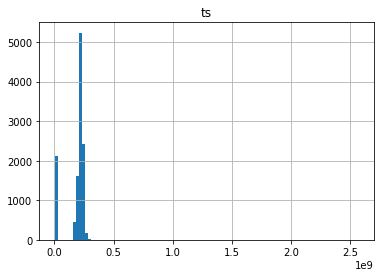

In [45]:
tl.hist(bins=100)

In [46]:
tl[tl.ts>.2e9].groupby('source').ts.describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
medium,8532.0,2.310031e+08,8.148377e+07,200044100.0,215821050.0,225392100.0,235664925.0,2.571958e+09
small,58.0,2.097150e+08,1.588914e+07,200175400.0,202307925.0,205142600.0,207637025.0,2.828106e+08


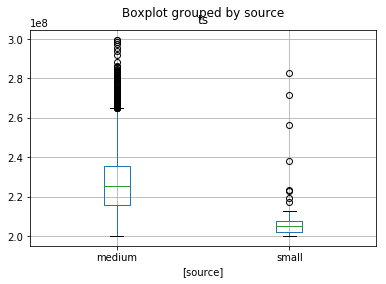

In [50]:
tl[(tl.ts>.2e9)&(tl.ts<.3e9)].boxplot(by='source')

In [51]:
tl1 = pd.read_csv('../../match_by_id_medium.times', names=['ts'])
tl1['source'] = 'medium'
tl2 = pd.read_csv('../../match_by_id_small.times', names=['ts'])
tl2['source'] = 'small'
tl = tl1.append(tl2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ec5a95a90>]],
      dtype=object)

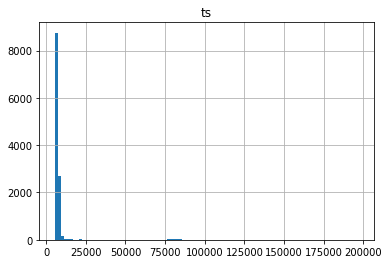

In [57]:
tl.hist(bins=100)

In [59]:
tl.groupby('source').ts.describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
medium,11070.0,8551.201445,11413.770559,5300.0,6100.0,6700.0,7200.0,197200.0
small,1011.0,9284.174085,11559.730665,5300.0,7000.0,7400.0,8000.0,139100.0


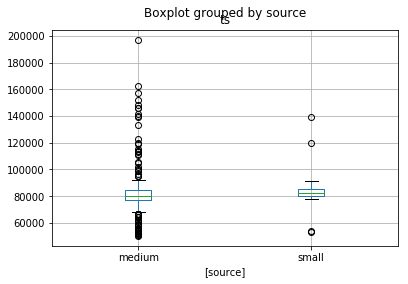

In [58]:
tl[tl.ts>50000].boxplot(by='source')